<a href="https://colab.research.google.com/github/YOONINJAE/-_study/blob/master/%EC%8B%A4%EC%8A%B5_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mycar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:

# cyl개수가 높을수록 마력이 떨어진다, 적어질수록 연비(효율) 높아진다
# mpg = mile per gallon
mtcars.groupby('cyl')['mpg'].aggregate(['mean','std']) # cyl그룹바이에서 mpg변수만을 뽑아낸다

#mtcars.groupby('am')['mpg'].aggregate(['mean','std']) #am : 자동이냐 수동이냐
#mtcars.groupby('vs')['mpg'].aggregate(['mean','std'])

#mtcars.std(axis=0)
#mtcars.loc[4:8:2, ['cyl']].aggregate(["mean",'std'])
#mtcars.['cyl'].aggregate(['mean',''])

,mean,std
cyl,,
4,26.663636,4.509828
6,19.742857,1.453567
8,15.100000,2.560048


In [ ]:
des_result = mtcars.describe()
five_num = des_result.loc['min':'max', ['mpg','wt']]
mtcars.groupby('cyl')['mpg'].aggregate(["mean","std"])
five_num[::-1]

,mpg,wt
max,33.900,5.42400
75%,22.800,3.61000
50%,19.200,3.32500
25%,15.425,2.58125
min,10.400,1.51300


In [ ]:
## Result_3, Value counts of cyl vs arm
mtcars.groupby(['cyl','am']).mean()

mpg        disp          hp  ...     vs      gear      carb
cyl am                                     ...                           
4   0   22.900000  135.866667   84.666667  ...  1.000  3.666667  1.666667
    1   28.075000   93.612500   81.875000  ...  0.875  4.250000  1.500000
6   0   19.125000  204.550000  115.250000  ...  1.000  3.500000  2.500000
    1   20.566667  155.000000  131.666667  ...  0.000  4.333333  4.666667
8   0   15.050000  357.616667  194.166667  ...  0.000  3.000000  3.083333
    1   15.400000  326.000000  299.500000  ...  0.000  5.000000  6.000000

[6 rows x 9 columns]

In [ ]:
#result_5. mean barplot of mpg by cyl
x = np.arange(3)

#cyls = ['4n','6n','8n']
kpg_m = mtcars.groupby('cyl')['kpg'].mean()
#plt.bar([4,6,8], [42.928455,31.786000,24.311000] )
print(kpg_m.index)
print(kpg_m.values)
plt.bar(kpg_m.index, kpg_m.values ) # 일일이 복붙할 필요 업ㄳ어짐

plt.xlabel('Cylinder number')
plt.ylabel('Efficiency (k/g')
plt.xticks(kpg_m.index,['4n','6n','8n'])
###################
for i in range(3):
  plt.text(x = kpg_m.index[i],
           y = kpg_m.values[i]+0.4,
           s= kpg_m.values[i].round(2), # 소수점 끊기
           horizontalalignment = 'center')
###################
##노가다
#plt.text(4, 42.92+1, 42.92)
plt.ylim(0,50)
plt.show()

#mtcars.groupby('cyl')['mpg'].aggregate(['mean','std']) # cyl그룹바이에서 mpg변수만을 뽑아낸다


KeyError: ignored

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


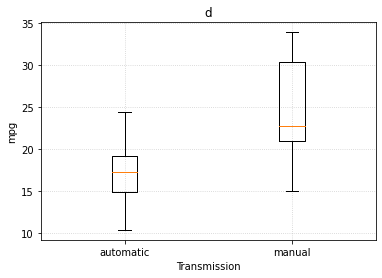

In [ ]:
#Result_6. boxplot of mpg by am
am0 = mtcars[mtcars['am'] == 0]['mpg']
am1 = mtcars[mtcars['am'] == 1]['mpg']
#print(am1)
# am0 = mtcars

plt.boxplot([am0,am1]) # mtcars.mpg
#mtcars.boxplot('mpg',by ='am')


plt.xlabel('Transmission')
plt.ylabel('mpg')
plt.xticks([1,2],['automatic','manual'])
plt.title("d")
plt.grid(color = 'gray', linestyle = ":", alpha = 0.4)
plt.show()

In [ ]:
## Result_4 mpg to kpg(*1.61)
#mtcars.loc['mpg':,"kpg"] = mtcars["mpg"]*1.61
mtcars['kpg'] = mtcars['mpg']*1.61
new_mtcars = mtcars[['Unnamed: 0','mpg','kpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']]
mtcars.columns
colnames = ['Unnamed: 0', 'mpg','kpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb']
mtcars = mtcars[colnames]
#mtcars.columns # 열 이름 뽑아내기
#new_mtcars
mtcars.head()